In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
%matplotlib inline


#loading the dataset and ignoring warnings from lines not formatted well.
startup_data= pd.read_csv('startup_data.csv', error_bad_lines=False)

#turning our dataset into a dataframe
df = pd.DataFrame(startup_data)

In [ ]:
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01/01/2007,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01/01/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01/01/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08/01/2010,10/01/2012,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
#duplicating the main dataset
start_up = df

In [ ]:
start_up.head(10)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01/01/2007,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01/01/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01/01/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08/01/2010,10/01/2012,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0,01/01/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,CA,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,01/01/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,1,01/01/2004,NaN,8/24/2005,10/04/2010,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,CA,1,0,0,0,0,finance,0,0,0,0,0,0,0,0,0,1,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,1,01/01/2002,NaN,08/02/2005,02/08/2013,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,MA,0,0,1,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,1,06/01/2005,NaN,02/01/2007,02/05/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:498,1,1,1,0,0,0,1.0000,1,acquired


In [ ]:
#dropping cells we have agreed are not useful
to_drop = ["Unnamed: 0", "zip_code", "city","Unnamed: 6","name","labels", "state_code.1", "object_id"]

Dropping columns from start up head


In [ ]:
for item in to_drop:
  start_up.drop(columns=item, axis=1, inplace=True)

# start_up.drop(columns='Unnamed: 0',axis=1, inplace=True)

In [ ]:
start_up.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,01/01/2007,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,c:16283,01/01/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,c:65620,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,c:42668,01/01/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,c:65806,08/01/2010,10/01/2012,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
start_up.columns

Index(['state_code', 'latitude', 'longitude', 'id', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [ ]:
start_up.describe

<bound method NDFrame.describe of     state_code   latitude   longitude  ... avg_participants is_top500    status
0           CA  42.358880  -71.056820  ...           1.0000         0  acquired
1           CA  37.238916 -121.973718  ...           4.7500         1  acquired
2           CA  32.901049 -117.192656  ...           4.0000         1  acquired
3           CA  37.320309 -122.050040  ...           3.3333         1  acquired
4           CA  37.779281 -122.419236  ...           1.0000         1    closed
..         ...        ...         ...  ...              ...       ...       ...
918         CA  37.740594 -122.376471  ...           6.0000         1  acquired
919         MA  42.504817  -71.195611  ...           2.6667         1    closed
920         CA  37.408261 -122.015920  ...           8.0000         1    closed
921         CA  37.556732 -122.288378  ...           1.0000         1  acquired
922         CA  37.386778 -121.966277  ...           3.0000         1  acquired

[923 

In [ ]:
start_up_success = start_up.groupby(['status'], as_index=False)['id'].count()

In [ ]:
start_up_success.head()

,status,id
0,acquired,597
1,closed,326


In [ ]:
start_up_success = start_up[start_up['status'] == 'acquired']

In [ ]:
start_up_success.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,01/01/2007,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,c:16283,01/01/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,c:65620,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,c:42668,01/01/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
6,CA,37.391559,-122.070264,c:16191,01/01/2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1.6667,1,acquired


In [ ]:
start_up_success["founded_at"] = pd.to_datetime(start_up_success["founded_at"])
start_up_success.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
6,CA,37.391559,-122.070264,c:16191,2005-01-01,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1.6667,1,acquired


In [ ]:
start_up_success['founded_at'] = start_up_success['founded_at'].apply(lambda a: a.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
start_up_success.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,2007,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,c:16283,2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,c:65620,2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,c:42668,2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,acquired
6,CA,37.391559,-122.070264,c:16191,2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1.6667,1,acquired


In [ ]:
success_by_year = start_up_success.groupby(['founded_at'], as_index=False)['id'].count()

In [ ]:
success_by_year.head()

,founded_at,id
0,2000,53
1,2001,30
2,2002,45
3,2003,47
4,2004,46


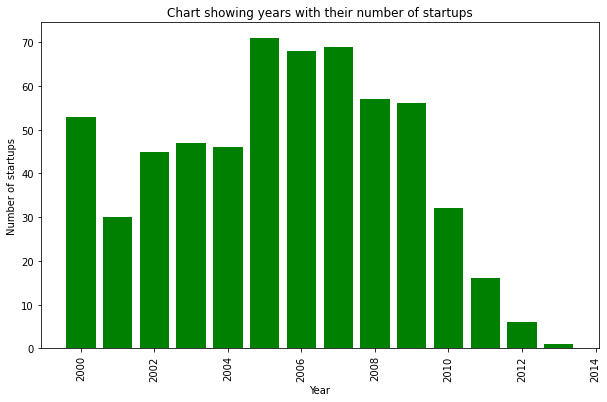

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(success_by_year['founded_at'], success_by_year['id'], color='green')
plt.title('Chart showing years with their number of startups')
plt.ylabel('Number of startups')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.show()

In [ ]:
success_by_year.sort_values(['id'], ascending=False, inplace=True)

In [ ]:
top_five_years = success_by_year.head(5)

In [ ]:
top_five_years.head()

,founded_at,id
5,2005,71
7,2007,69
6,2006,68
8,2008,57
9,2009,56


CHART SHOWING THE YEARS AND THE NUMBER OF START UPS

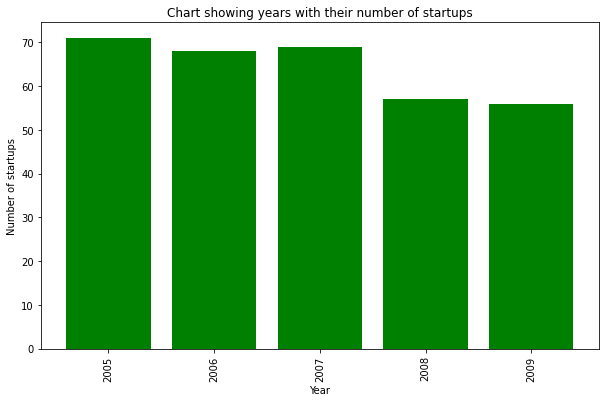

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(top_five_years['founded_at'], top_five_years['id'], color='green')
plt.title('Chart showing years with their number of startups')
plt.ylabel('Number of startups')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.show()

GROUPING BY SECTORS

In [ ]:
success_by_year = start_up_success.groupby(['founded_at'], as_index=False)['id'].count()

In [ ]:
top_five_years.head()

,founded_at,id
5,2005,71
7,2007,69
6,2006,68
8,2008,57
9,2009,56


In [ ]:
for years in top_five_years['founded_at']:
  for date in start_up_success:
    acquired_startups = start_up_success[(start_up_success['founded_at'] == 2005) |(start_up_success['founded_at'] == 2007) |(start_up_success['founded_at'] == 2008) |(start_up_success['founded_at'] == 2006) |(start_up_success['founded_at'] == 2009)  ]

    


In [ ]:
acquired_startups.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,2007,NaN,04/01/2009,01/01/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,acquired
2,CA,32.901049,-117.192656,c:65620,2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,acquired
6,CA,37.391559,-122.070264,c:16191,2005,NaN,9/21/2006,3/18/2010,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1.6667,1,acquired
9,CA,37.427235,-122.145783,c:498,2005,NaN,02/01/2007,02/05/2010,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.0000,1,acquired
13,NY,40.702760,-73.986668,c:1491,2007,NaN,12/03/2007,05/03/2010,0.0192,2.4356,0.7945,4.3781,15,3,9950000,3,0,1,0,0,0,education,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,2.3333,1,acquired


In [ ]:
acquired_startups.describe

<bound method NDFrame.describe of     state_code   latitude   longitude  ... avg_participants  is_top500    status
0           CA  42.358880  -71.056820  ...           1.0000          0  acquired
2           CA  32.901049 -117.192656  ...           4.0000          1  acquired
6           CA  37.391559 -122.070264  ...           1.6667          1  acquired
9           CA  37.427235 -122.145783  ...           1.0000          1  acquired
13          NY  40.702760  -73.986668  ...           2.3333          1  acquired
..         ...        ...         ...  ...              ...        ...       ...
912         CA  37.780134 -122.396744  ...           4.0000          1  acquired
914         NY  40.750519  -73.993494  ...           2.0000          1  acquired
916         NY  40.742953  -73.984461  ...           2.3333          1  acquired
918         CA  37.740594 -122.376471  ...           6.0000          1  acquired
921         CA  37.556732 -122.288378  ...           1.0000          1  acq

In [ ]:
startup_category=acquired_startups.groupby(['category_code'], as_index=False)['id'].count()

In [ ]:
startup_category.head()

,category_code,id
0,advertising,31
1,analytics,11
2,biotech,9
3,cleantech,8
4,consulting,1


In [ ]:
startup_category.sort_values(['id'], ascending=False, inplace=True)

In [ ]:
startup_category.head(6)

,category_code,id
29,web,62
25,software,43
7,enterprise,33
0,advertising,31
15,mobile,25
10,games_video,23


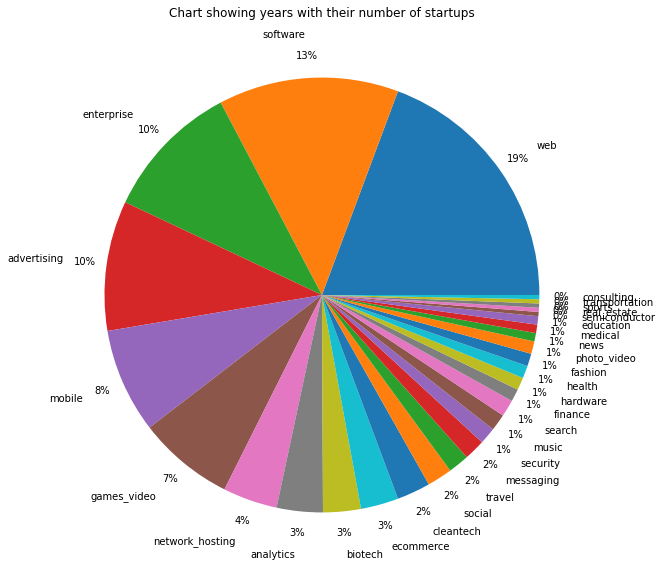

In [ ]:
plt.figure(figsize = (20,10))
plt.pie(startup_category['id'], labels=startup_category['category_code'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Chart showing years with their number of startups')

plt.show()

CLOSED STARTUPS


In [ ]:
closed_startup = start_up[(start_up['status']== 'closed')]

In [ ]:
closed_startup.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
4,CA,37.779281,-122.419236,c:65806,08/01/2010,10/01/2012,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.00,1,closed
5,CA,37.406914,-122.090370,c:22898,01/01/2002,2/15/2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.00,1,closed
11,CA,37.452992,-122.185098,c:4829,01/01/2006,12/02/2011,02/01/2007,05/03/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.75,1,closed
12,KY,38.241467,-85.724511,c:30290,01/01/2004,4/27/2012,11/25/2008,11/25/2008,4.9041,4.9041,NaN,NaN,0,1,350000,0,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00,0,closed
15,VA,38.901301,-77.265158,c:54177,01/01/1999,3/28/2010,08/09/2005,08/09/2005,6.6082,6.6082,NaN,NaN,0,1,200000,0,0,0,0,0,1,public_relations,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.00,0,closed


In [ ]:
closed_startup["founded_at"] = pd.to_datetime(closed_startup["founded_at"])
closed_startup["closed_at"] = pd.to_datetime(closed_startup["closed_at"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
closed_startup.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.00,1,closed
5,CA,37.406914,-122.090370,c:22898,2002-01-01,2009-02-15,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.00,1,closed
11,CA,37.452992,-122.185098,c:4829,2006-01-01,2011-12-02,02/01/2007,05/03/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.75,1,closed
12,KY,38.241467,-85.724511,c:30290,2004-01-01,2012-04-27,11/25/2008,11/25/2008,4.9041,4.9041,NaN,NaN,0,1,350000,0,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00,0,closed
15,VA,38.901301,-77.265158,c:54177,1999-01-01,2010-03-28,08/09/2005,08/09/2005,6.6082,6.6082,NaN,NaN,0,1,200000,0,0,0,0,0,1,public_relations,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.00,0,closed


In [ ]:
closed_startup['founded_at'] = closed_startup['founded_at'].apply(lambda a: a.year)
closed_startup['closed_at'] = closed_startup['closed_at'].apply(lambda a: a.year)
closed_startup.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
4,CA,37.779281,-122.419236,c:65806,2010,2012,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.00,1,closed
5,CA,37.406914,-122.090370,c:22898,2002,2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.00,1,closed
11,CA,37.452992,-122.185098,c:4829,2006,2011,02/01/2007,05/03/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.75,1,closed
12,KY,38.241467,-85.724511,c:30290,2004,2012,11/25/2008,11/25/2008,4.9041,4.9041,NaN,NaN,0,1,350000,0,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00,0,closed
15,VA,38.901301,-77.265158,c:54177,1999,2010,08/09/2005,08/09/2005,6.6082,6.6082,NaN,NaN,0,1,200000,0,0,0,0,0,1,public_relations,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.00,0,closed


In [ ]:
closed_startup['running_age'] = closed_startup['closed_at'] - closed_startup['founded_at']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
closed_startup.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,running_age
4,CA,37.779281,-122.419236,c:65806,2010,2012,08/01/2010,04/01/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.00,1,closed,2
5,CA,37.406914,-122.090370,c:22898,2002,2009,7/18/2006,7/18/2006,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,1,0,0,0,0,network_hosting,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.00,1,closed,7
11,CA,37.452992,-122.185098,c:4829,2006,2011,02/01/2007,05/03/2011,1.0849,5.3370,-0.6164,4.6082,8,5,10400000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1.75,1,closed,5
12,KY,38.241467,-85.724511,c:30290,2004,2012,11/25/2008,11/25/2008,4.9041,4.9041,NaN,NaN,0,1,350000,0,0,0,0,0,1,web,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.00,0,closed,8
15,VA,38.901301,-77.265158,c:54177,1999,2010,08/09/2005,08/09/2005,6.6082,6.6082,NaN,NaN,0,1,200000,0,0,0,0,0,1,public_relations,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1.00,0,closed,11


In [ ]:
closed_startup.describe

<bound method NDFrame.describe of     state_code   latitude   longitude  ... is_top500  status  running_age
4           CA  37.779281 -122.419236  ...         1  closed            2
5           CA  37.406914 -122.090370  ...         1  closed            7
11          CA  37.452992 -122.185098  ...         1  closed            5
12          KY  38.241467  -85.724511  ...         0  closed            8
15          VA  38.901301  -77.265158  ...         0  closed           11
..         ...        ...         ...  ...       ...     ...          ...
911         CA  37.658713 -122.399382  ...         1  closed            9
913         TX  29.739322  -95.444747  ...         0  closed            4
915         WI  43.090756  -89.522805  ...         0  closed            8
919         MA  42.504817  -71.195611  ...         1  closed           10
920         CA  37.408261 -122.015920  ...         1  closed           13

[326 rows x 42 columns]>

In [ ]:
negative_check_df= closed_startup[(closed_startup['founded_at']> closed_startup['closed_at'])]

In [ ]:
closed_startup.drop(index=[558,88], inplace=True, axis=0)
# closed_startup.drop(index=(88), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
negative_check_df.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,running_age
88,CA,37.388869,-122.072353,c:280611,2013,2005,11/19/2013,11/19/2013,0.8822,0.8822,NaN,NaN,7,1,12000000,0,1,0,0,0,0,ecommerce,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,9.0,1,closed,-8
558,NY,40.743662,-73.984268,c:2245,2013,2009,04/01/2004,04/01/2004,-9.0466,-9.0466,-6.0466,-3.8822,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,0,closed,-4


In [ ]:
negative_check_df= closed_startup[(closed_startup['founded_at']> closed_startup['closed_at'])]

In [ ]:
start_up_running_age = closed_startup.groupby(['running_age'], as_index=True)['id'].count()

In [ ]:
for years in closed_startup['running_age']:
    less_than_6 = closed_startup[(closed_startup['running_age']<=5)]['id'].count()
    six_to_ten = closed_startup[(closed_startup['running_age']>5) & (closed_startup['running_age']<=10)]['id'].count()
    ten_to_15 = closed_startup[(closed_startup['running_age']>10) & (closed_startup['running_age']<=15)]['id'].count()
    more_than_15 = closed_startup[(closed_startup['running_age']>15)]['id'].count()
  

 

In [ ]:
list_of_years = [less_than_6,six_to_ten,ten_to_15,more_than_15]
list_of_names = ['0 - 5 yrs', '5 -10 years', '10 - 15 years', '> 15 years']

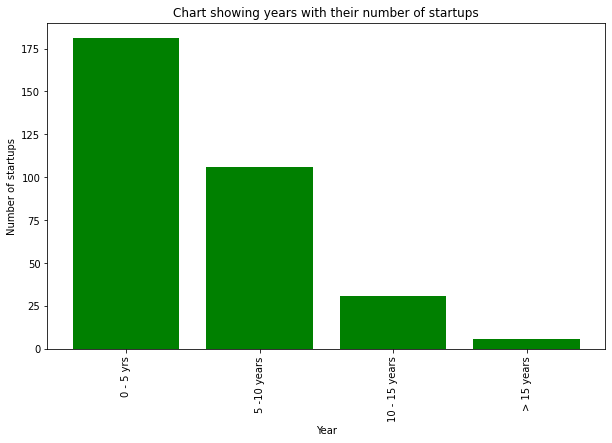

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(list_of_names,list_of_years, color='green')
plt.title('Chart showing years with their number of startups')
plt.ylabel('Number of startups')
plt.xlabel('Year')
plt.xticks(rotation=90)

plt.show()

Grouping by funding rounds

In [ ]:
funding_rounds = closed_startup.groupby(['funding_rounds'], as_index=False)['id'].count()

In [ ]:
funding_rounds.sort_values(['id'], ascending=False, inplace=True)

In [ ]:
funding_rounds.head(100)

,funding_rounds,id
0,1,157
1,2,101
2,3,32
3,4,17
4,5,8
6,7,6
5,6,2
7,8,1


In [ ]:
start_up_running_age.head(100)

running_age
0      2
1     16
2     36
3     46
4     40
5     41
6     30
7     30
8     21
9     14
10    11
11    10
12     5
13     9
14     4
15     3
16     1
17     1
19     1
20     1
24     1
28     1
Name: id, dtype: int64